## HW 3

##### Sarasij Banerjee

## Question 1

The target is to generate a model that fits the observed data with minimum error. The parameters to be optimized are $A_{12}$ and $A_{21}$. Therefore the optimization problem can be formulated as $min 

In [4]:

import torch as tor
import matplotlib.pyplot as plt
from torch.autograd import Variable
import numpy as np
T = 20
x1 = np.linspace(0,1,11)
x2 = np.linspace(1,0,11)
a_w = np.array([8.07131, 1730.63, 233.426])
a_d = np.array([7.43155, 1554.679, 240.337])
p_w = 10**(a_w[0] - a_w[1]/(T + a_w[2]))
p_d = 10**(a_d[0] - a_d[1]/(T + a_d[2]))
P = np.array([28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5])

x1 = tor.tensor(x1, requires_grad=False, dtype=tor.float32)
x2 = tor.tensor(x2, requires_grad=False, dtype=tor.float32)

A = Variable(tor.tensor([1.0, 1.0]),requires_grad = True)
P = tor.tensor(P, requires_grad=False, dtype=tor.float32)

alpha = 0.001

for i in range(50):
    P_pred = x1 * tor.exp(A[0] * (A[1] * x2/(A[0] * x1 + A[1] * x2))**2) * p_w +\
        x2*tor.exp(A[1]*(A[0]*x1/(A[0]*x1 + A[1]*x2))**2) * p_d

    obj = (P_pred - P)**2
    obj = obj.sum()
    obj.backward()

    with tor.no_grad():
        A -= alpha*A.grad
        A.grad.zero_()

print('Optimal Values of A_12 ({}) and A_21 ({})'.format(A[0],A[1]))
print('fOptimal objective value: ',obj.data.numpy())



Optimal Values of A_12 (1.9579263925552368) and A_21 (1.6895899772644043)
fOptimal objective value:  0.67021877


[28.824099 34.641956 36.451256 36.86612  36.872917 36.748806 36.389854
 35.385315 32.949852 27.733002 17.473251]


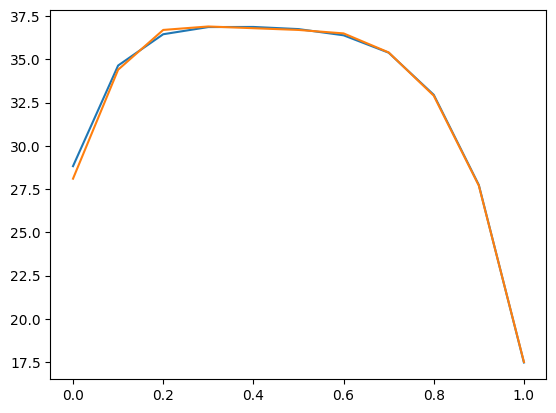

In [5]:
P_pr_plt = P_pred.detach().numpy()
P_plot = P.detach().numpy()
x1 = x1.detach().numpy()
print(P_pr_plt)

plt.plot(x1,P_pr_plt)
plt.plot(x1,P_plot)
plt.show()

From the results above, it is clearly visible that the predicted model provides a high fit to the obvserved dataset. This is also supported by the low value of the loss function ($e=0.67$) corresponding to the optimal values. 

## Question 2:

In [7]:
## problem 2:

import numpy as np
from bayes_opt import BayesianOptimization

def obj_function(x,y):
    obj = (4 - 2.1*x**2 + (x**4)/3)*x**2 + x*y +  (-4 + 4*y**2)*y**2
    return -obj

pbounds = {'x': (-3, 3), 'y': (-2, 2)}

optimizer = BayesianOptimization(
    f=obj_function,
    pbounds=pbounds,
    random_state=1,
)


  Cloning https://github.com/fmfn/BayesianOptimization to c:\users\baner\appdata\local\temp\pip-req-build-eqnkhqmw
  Resolved https://github.com/fmfn/BayesianOptimization to commit 05941f75134165506eeb750fb5fc94f4d5668d5c
Note: you may need to restart the kernel to use updated packages.  Building wheel for bayesian-optimization (setup.py): started


  Running command git clone -q https://github.com/fmfn/BayesianOptimization 'C:\Users\baner\AppData\Local\Temp\pip-req-build-eqnkhqmw'



  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.3.0-py3-none-any.whl size=16868 sha256=5ca86188838241393f2799a959d524cebfb305e49c2326e32f677390974f019c
  Stored in directory: C:\Users\baner\AppData\Local\Temp\pip-ephem-wheel-cache-ce3pqdf7\wheels\de\4b\fc\ca63ecde7529784254ce89a4c60adafcb973a6b20aa9f18dd4
Successfully built bayesian-optimization
